Цель - познакомиться с методом кластеризации K-mean с помощью пакета sklearn. 

Для выполнения задания используется набор данных из предыдущей лр.

Что нужно сделать:
1. К текущему датасету необходимо добавить новый аттрибут, например, если есть дата рождения, то посчитать возраст или определить популярность фильма по количеству просмотров и т.п.

2. "Причесать" датасет: удалить выбросы и дубли, обработать пропущенные значения, найти кривые данные и т.п.

3. Построить графики зависимости одной переменной от другой (plt.scatter), описать какие кластеры (группы) вы видите. Построить несколько разных графиков, найти ярковыраженные группы.

4. Изучить перечисленные ноутбуки, по примеру, попробовать применить метод KMeans к вашему датасету (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

https://www.kaggle.com/kushal1996/customer-segmentation-k-means-analysis

https://www.kaggle.com/karthickaravindan/k-means-clustering-project

https://www.kaggle.com/hellbuoy/online-retail-k-means-hierarchical-clustering

https://www.kaggle.com/sirpunch/k-means-clustering

Если ваш датасет не подходит для задачи, его можно поменять. 

5. Написать выводы

### Датасет
Выбран датасет с https://www.kaggle.com/datasets - "penguins".

Данные были собраны и предоставлены доктором Кристен Горман и станцией Палмер, Антарктический фильтр, членом Сети долгосрочных экологических исследований.

In [38]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.io.pytables import IndexCol
import datetime
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

Всего 8 признаков, 3 из которых - категориальные. Добавим новый аттрибут: сколько лет прошло со сбора данных в годах.

In [20]:
penguins_df = pd.read_csv("./penguins.csv", index_col=0)
current_year = datetime.datetime.now().year
penguins_df['data_age_y'] = current_year - penguins_df['year']

penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,data_age_y
1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,16
2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,16
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,16
4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,16
5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,16
...,...,...,...,...,...,...,...,...,...
340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009,14
341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009,14
342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009,14
343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009,14


In [23]:
#получение числового представления, удаление пустых значений
penguins_df = penguins_df.dropna()
penguins_df['species'] = pd.factorize(penguins_df['species'])[0]
penguins_df['island'] = pd.factorize(penguins_df['island'])[0]
penguins_df['sex'] = pd.factorize(penguins_df['sex'])[0]

penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,data_age_y
1,0,0,39.1,18.7,181.0,3750.0,0,2007,16
2,0,0,39.5,17.4,186.0,3800.0,1,2007,16
3,0,0,40.3,18.0,195.0,3250.0,1,2007,16
5,0,0,36.7,19.3,193.0,3450.0,1,2007,16
6,0,0,39.3,20.6,190.0,3650.0,0,2007,16
...,...,...,...,...,...,...,...,...,...
340,2,2,55.8,19.8,207.0,4000.0,0,2009,14
341,2,2,43.5,18.1,202.0,3400.0,1,2009,14
342,2,2,49.6,18.2,193.0,3775.0,0,2009,14
343,2,2,50.8,19.0,210.0,4100.0,0,2009,14


In [24]:
#удаляем значения, если оно больше среднего в 10 раз (считаем это анамальным)
for column_name in penguins_df.columns:
  mean_value = penguins_df[column_name].mean()
  penguins_df = penguins_df[penguins_df[column_name] <= mean_value * 10]

penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,data_age_y
1,0,0,39.1,18.7,181.0,3750.0,0,2007,16
2,0,0,39.5,17.4,186.0,3800.0,1,2007,16
3,0,0,40.3,18.0,195.0,3250.0,1,2007,16
5,0,0,36.7,19.3,193.0,3450.0,1,2007,16
6,0,0,39.3,20.6,190.0,3650.0,0,2007,16
...,...,...,...,...,...,...,...,...,...
340,2,2,55.8,19.8,207.0,4000.0,0,2009,14
341,2,2,43.5,18.1,202.0,3400.0,1,2009,14
342,2,2,49.6,18.2,193.0,3775.0,0,2009,14
343,2,2,50.8,19.0,210.0,4100.0,0,2009,14


Построим графики зависимости одной переменной от другой.


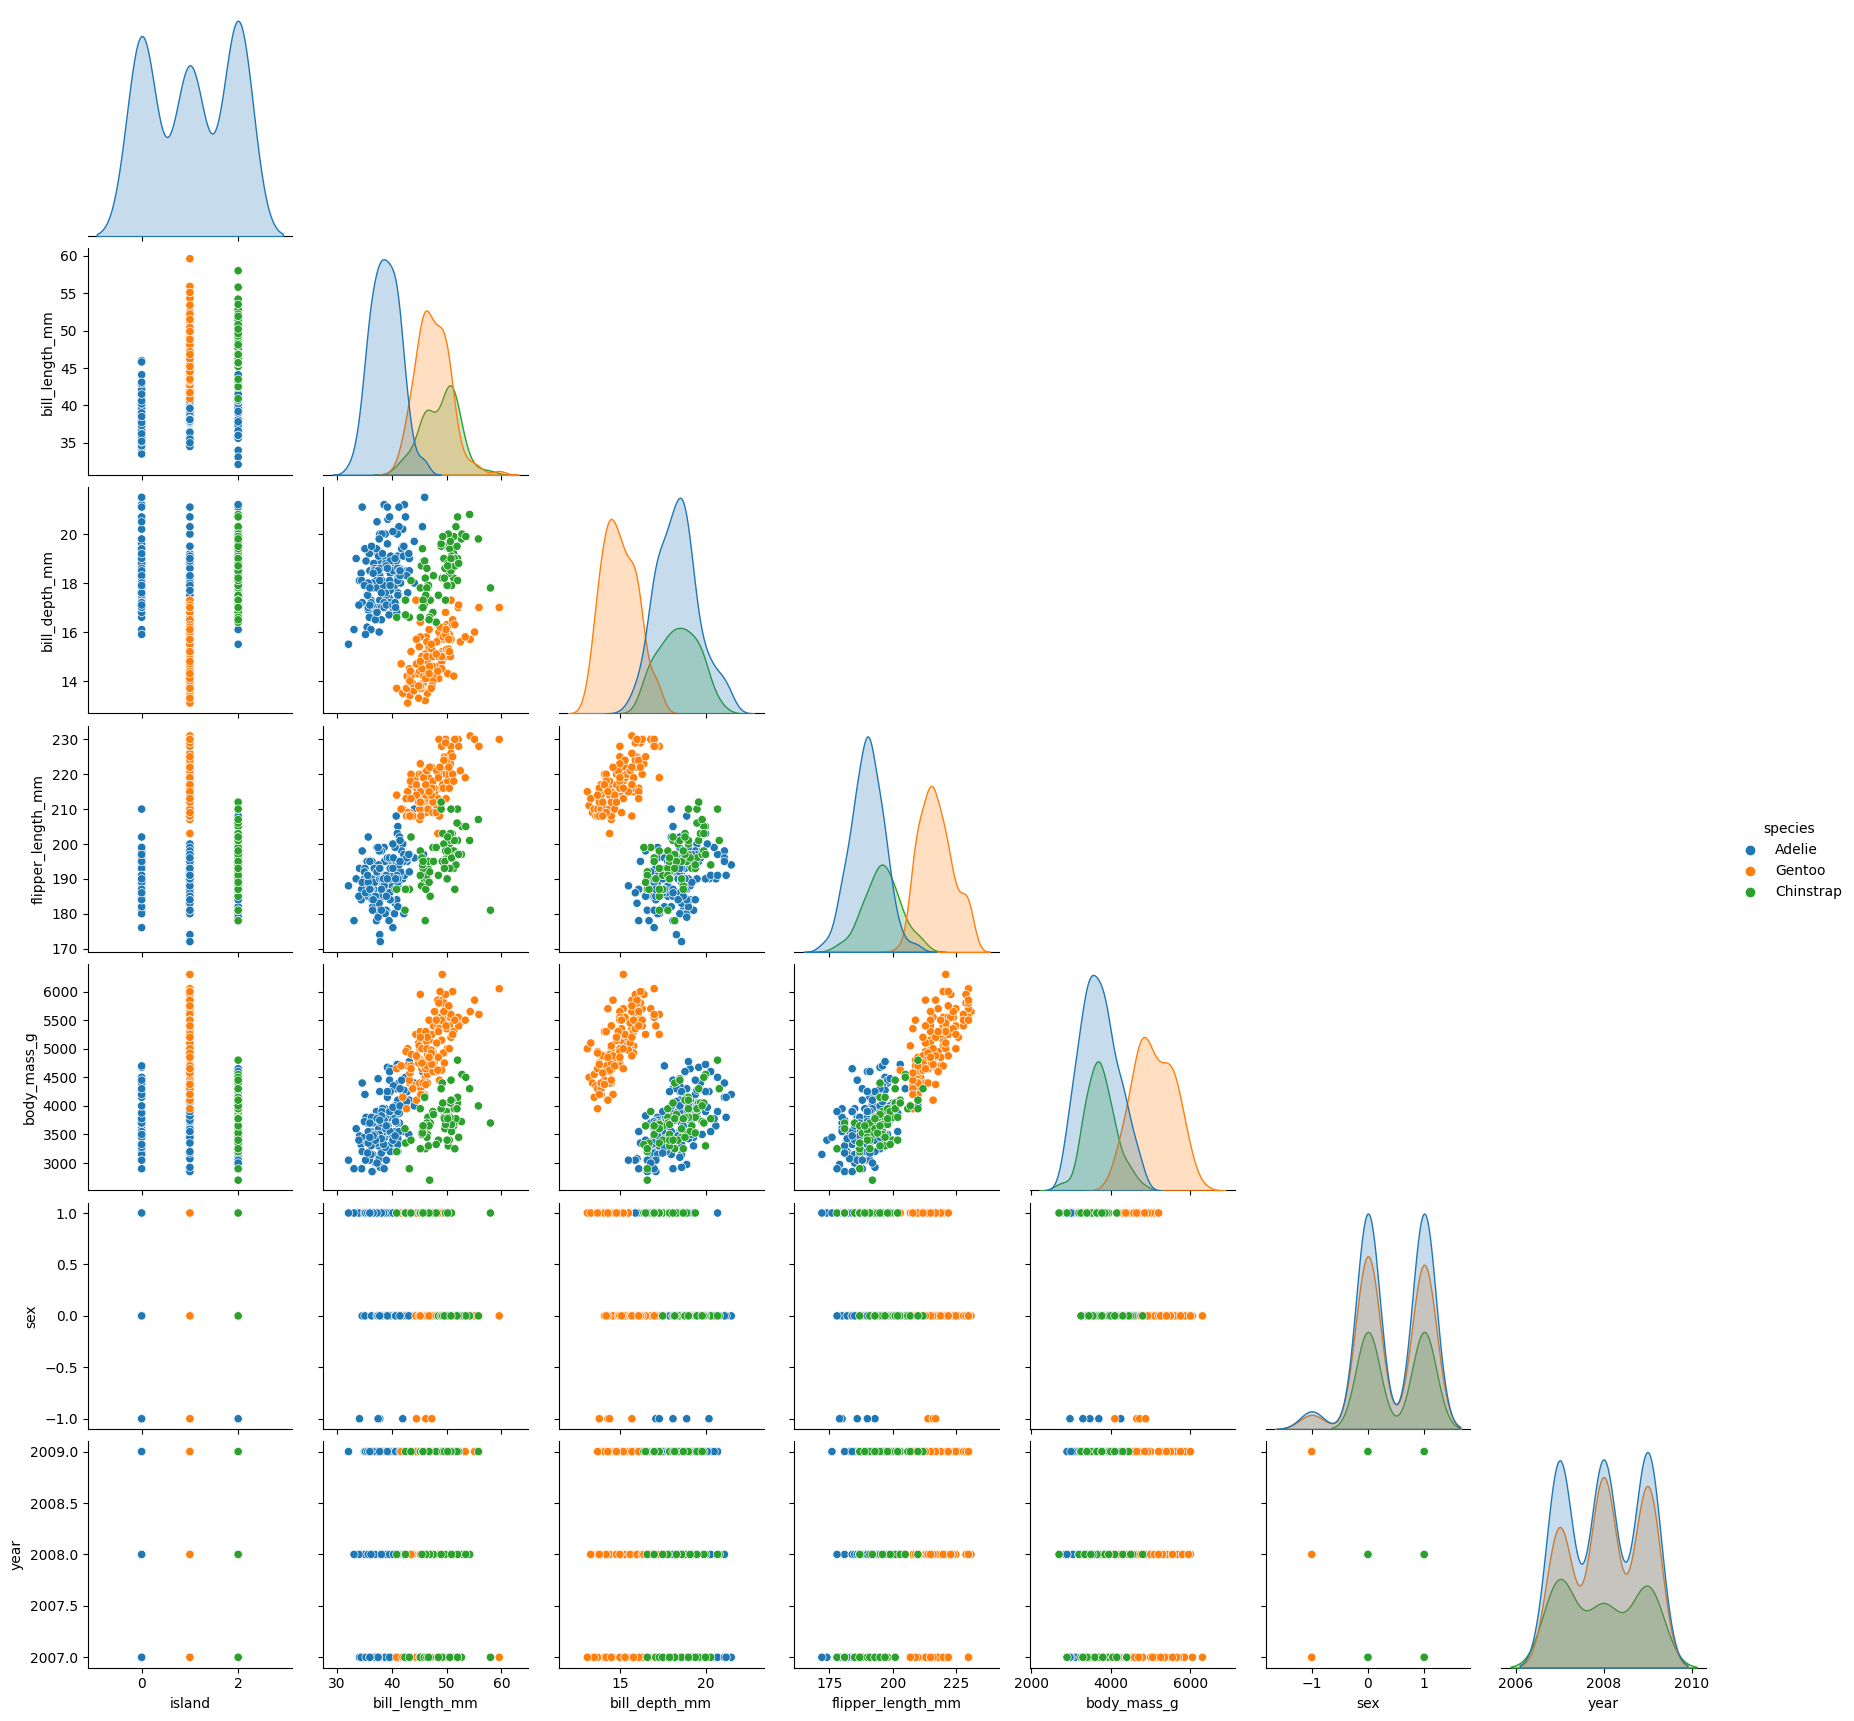

In [ ]:
original_penguins_df = pd.read_csv("./penguins.csv", index_col=0)
original_penguins_df['island'] = pd.factorize(original_penguins_df['island'])[0]
original_penguins_df['sex'] = pd.factorize(original_penguins_df['sex'])[0]
sns.pairplot(original_penguins_df,hue='species', corner=True)

По графкам можно увидель, что разные виды пингвинов хорошо выделяются во многих ячейках с числовыми признаками, например, на графике зависимости длины ласты от длины клюва. Однако, часто можно аметить, что пингвины вида Adelie и Chinstap сливаются между собой, например, на графике зависимости массы тела и глубины клюва.

Применим метод **KMeans** к датасету.

Кластеризация - это неконтролируемый алгоритм обучения, который пытается сгруппировать данные на основе их сходства. Сначала мы должны найти количество кластеров k, в которые мы хотим сгруппировать данные.

In [39]:
kmeans = KMeans(3)
kmeans.fit(penguins_df.drop('species',axis=1))
print(confusion_matrix(penguins_df.species,kmeans.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[102   0  44]
 [  0  74  45]
 [ 48   0  20]]


In [43]:
print(classification_report(penguins_df.species,kmeans.labels_), f"Accuracy is {np.round(100*accuracy_score(penguins_df.species,kmeans.labels_),2)}")

              precision    recall  f1-score   support

           0       0.68      0.70      0.69       146
           1       1.00      0.62      0.77       119
           2       0.18      0.29      0.23        68

    accuracy                           0.59       333
   macro avg       0.62      0.54      0.56       333
weighted avg       0.69      0.59      0.62       333
 Accuracy is 58.86


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

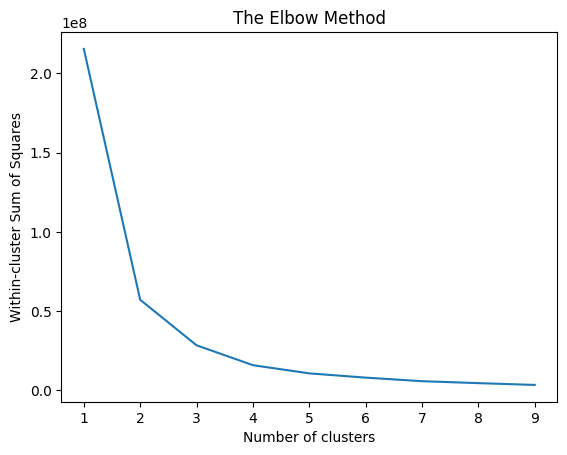

In [50]:
wcss=[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(penguins_df.drop('species',axis=1))
    pred_i = kmeans.labels_
    wcss.append(kmeans.inertia_)

plt.plot(range(1,10),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares');

Можно сделать вывод, что 3 - количество классов в датасете. если посмотреть на визуализацию ниже (на которой убраны пометки классов) их тоже можно заметить (на части графиков они сливаюся в 2).

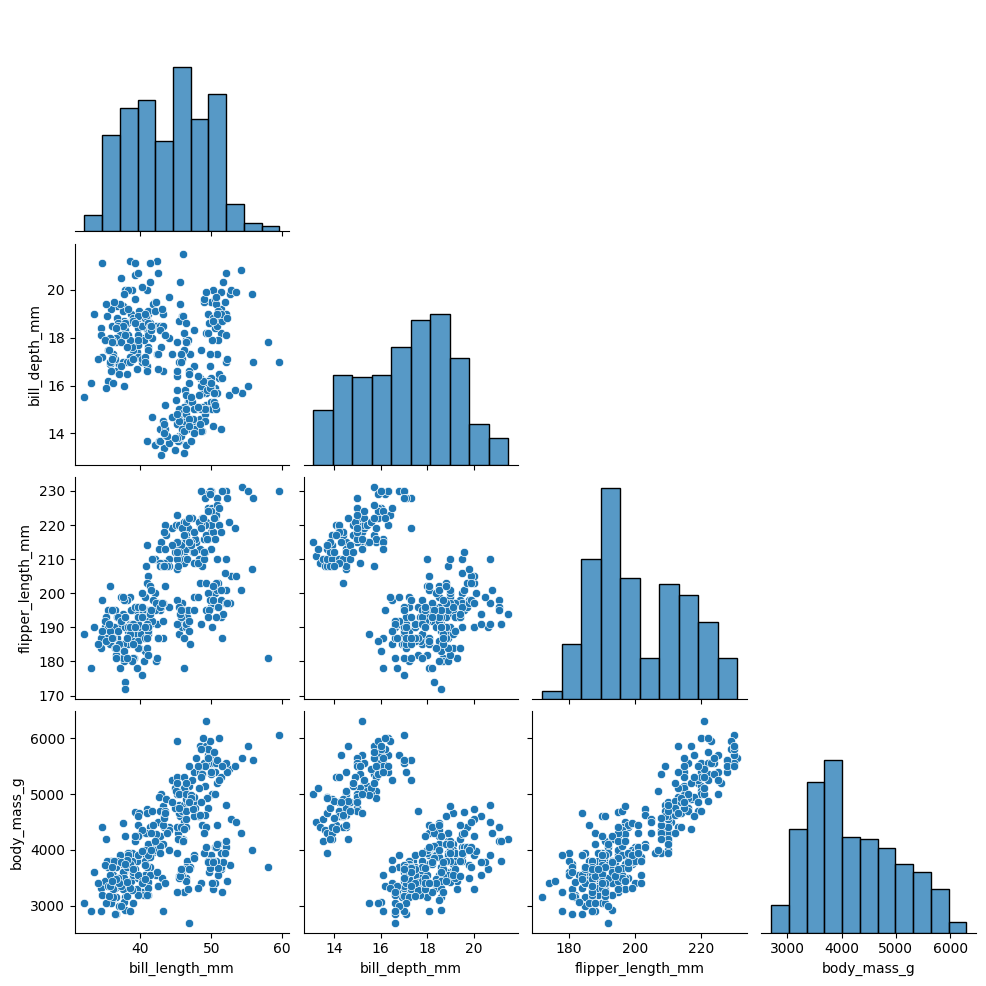

In [56]:
sns.pairplot(penguins_df.drop(['species', 'sex', 'island', 'year', 'cluster', 'data_age_y'],axis=1), corner=True)